# Daily Quiz

## 웹사이트 방문 회수 : data : sci
   *  조회순을 기준으로 그래프를 그려보세요.
   * Prophet모듈을 이용하여 forecast 예측해 보세요.
   * plot_components로 결과를 확인해 보세요.
   * 이 사이트는 유지해야 하나요? 아니면 닫아야 하나요? 의견을 기술하세요.

In [55]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data
import numpy as np
# 페이스북에서 개발한 시계열(시간의 흐름에 따라 관측된 자료) 예측 패키지
# conda install -c conda-forge pystan
from fbprophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# - 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 깨짐 방지
if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows' ):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else: 
    print('error')

In [56]:
web_traffic = pd.read_excel('C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/sci.xlsx', index_col=0)
web_traffic.head()

,분류,콘텐트타입,조회수
등록일,,,
2014-01-01,FUSION,일반,5328
2014-01-06,FOCUS,일반,3503
2014-01-08,FUSION,NaN,3462
2014-01-13,FOCUS,일반,5892
2014-01-15,FUNNY,만화,4750


In [57]:
# 불필요 column 삭제
web_traffic.drop('분류', axis=1, inplace=True)
web_traffic.drop('콘텐트타입', axis=1, inplace=True)

In [58]:
# 결측치 확인
print(web_traffic.isnull().sum())

조회수    0
dtype: int64


<AxesSubplot:xlabel='등록일'>

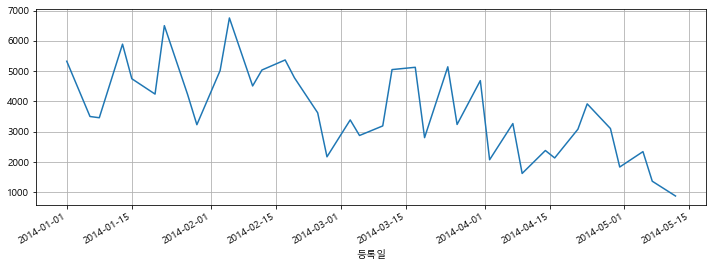

In [59]:
web_traffic['조회수'].plot(figsize=(12,4), grid=True)

In [60]:
# ds, y 확보
web_traffic.reset_index(inplace=True)
web_traffic.rename(columns={'등록일':'ds', '조회수':'y'}, inplace=True)
web_traffic.head()

,ds,y
0,2014-01-01,5328
1,2014-01-06,3503
2,2014-01-08,3462
3,2014-01-13,5892
4,2014-01-15,4750


In [61]:
# Prophet() 함수 사용시
# 주기성이 연단위(yearly_seasonality) 및 일단위(daily_seasonality)가 있다.
# Prophet 클래스 객체를 만들고 시계열 데이터를 입력으로 fit 메서드를 호출한다.
m = Prophet(daily_seasonality=True)
m.fit(web_traffic)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [62]:
# 16. 7. 1. ~ 17. 6. 30. 홈페이지 방문자수
# make_future_dataframe : 예측날짜 구간 생성
future = m.make_future_dataframe(periods=60) 
future.tail()

,ds
93,2014-07-07
94,2014-07-08
95,2014-07-09
96,2014-07-10
97,2014-07-11


In [63]:
# yhat = 예측값, lower/upper :예측 하한/상한
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2014-07-07,930.911559,-399.667249,2268.000062
94,2014-07-08,-985.153659,-2363.561982,432.768229
95,2014-07-09,546.178646,-770.086235,1817.457048
96,2014-07-10,-1034.098300,-2420.671337,312.553603
97,2014-07-11,-1058.570751,-2344.191710,257.134640


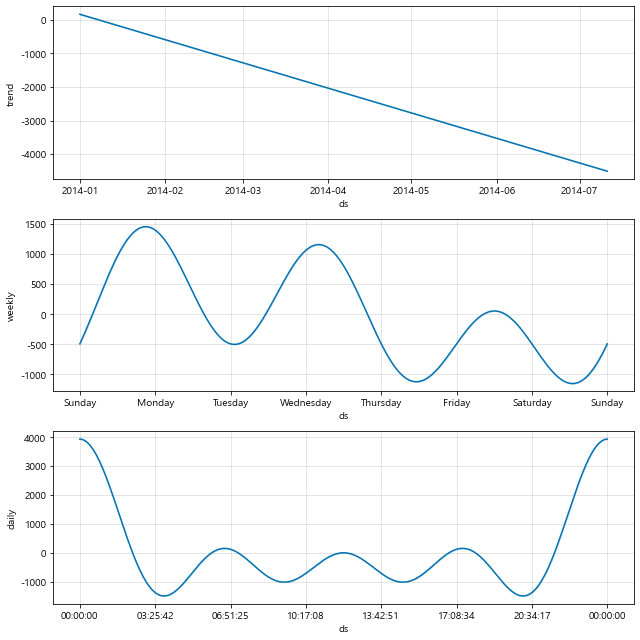

In [65]:
# plot_components : 선형회귀 및 계절성 성분별로 분리
m.plot_components(forecast);

* 결론 : 사이트는 뾰족한 수가 없으면 그냥 폐쇄하는 것으로..

## 시계열 데이터 분석 : 삼성 주식을 분석하세요. (005930.KS) or 관심주
  * 2020.01.01~ 2021.12.31일 까지의 시세를 확인하세요.
  * 1)의 기간의 종가(Close)를 기준으로 그래프를 그려 보세요.
  * 1년 후, 2022.12.31일 까지의 정보를 예측해 보세요.
  * 700일 간의 데이터를 예측해 보세요.
  * 실제 데이터와 예측값을 그래프로 그려 보세요.

In [66]:
start_date = '2020-01-01' 
end_date = '2021-12-31' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date)
SAM.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,51557.589844
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,51837.800781
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,51837.800781
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,52118.007812
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,53052.015625
2020-01-09,58600.0,57400.0,58400.0,58600.0,24102579.0,54733.246094
2020-01-10,59700.0,58300.0,58800.0,59500.0,16000170.0,55573.859375
2020-01-13,60000.0,59100.0,59600.0,60000.0,11359139.0,56040.859375
2020-01-14,61000.0,59900.0,60400.0,60000.0,16906295.0,56040.859375


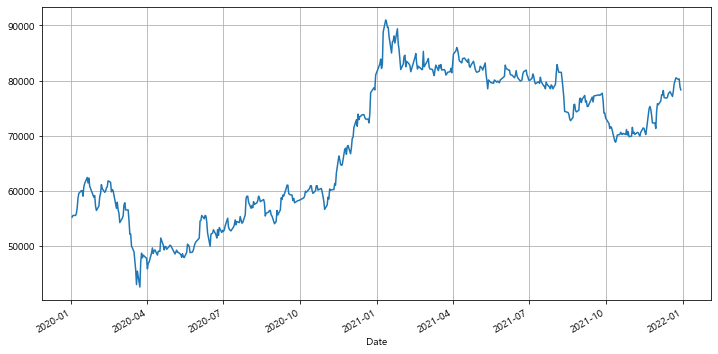

In [67]:
SAM['Close'].plot(figsize=(12,6), grid=True);

In [69]:
# index(날짜)를 추출하기 위해 초기화
SAM.reset_index(inplace=True)

In [71]:
SAM.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,51557.589844
1,2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,51837.800781
2,2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,51837.800781
3,2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,52118.007812
4,2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,53052.015625


In [72]:
# ds(Date), y(Close) 외 column 데이터프레임에서 제외
SAM = SAM.loc[:, ['Date','Close']]
SAM.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)
SAM.head()

,ds,y
0,2020-01-02,55200.0
1,2020-01-03,55500.0
2,2020-01-06,55500.0
3,2020-01-07,55800.0
4,2020-01-08,56800.0


In [73]:
m = Prophet(daily_seasonality=True)
m.fit(SAM)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [74]:
future = m.make_future_dataframe(periods=366)
future.tail()

,ds
857,2022-12-27
858,2022-12-28
859,2022-12-29
860,2022-12-30
861,2022-12-31


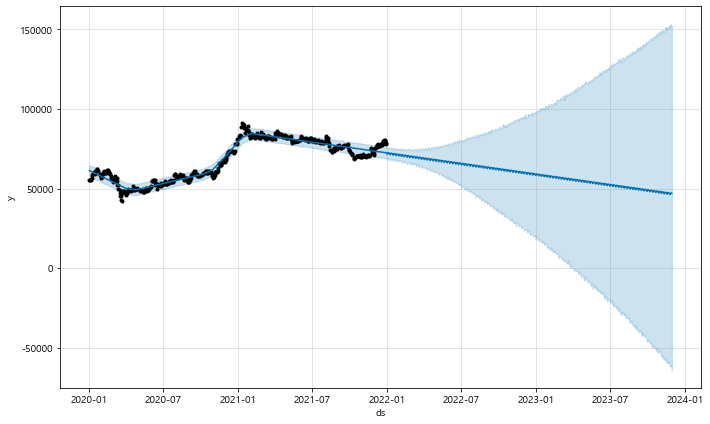

In [76]:
future = m.make_future_dataframe(periods=700)
forecast = m.predict(future)
m.plot(forecast);

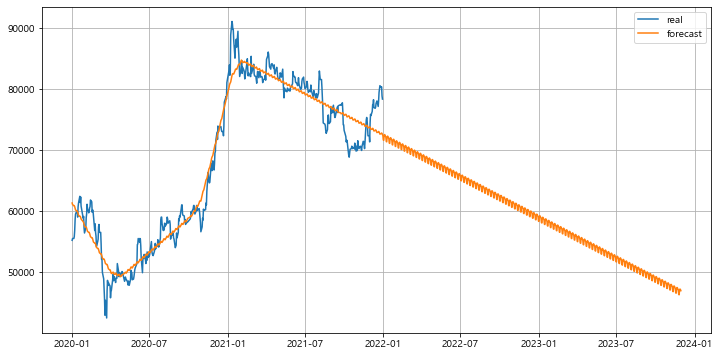

In [79]:
plt.figure(figsize=(12,6))
plt.plot(SAM['ds'], SAM['y'], label='real')
plt.plot(forecast['ds'],  forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()